CS109 Final Project

Rosan Bishwakarma, Rudra Barua, Albert Zhang, Jeremy Zhang

Group 69

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [2]:
import random
random_seed = 0
random.seed(random_seed)

import os
import sys

import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score
)                           
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

%matplotlib inline

# RUN THIS CELL
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline
pd.set_option('display.width', 1000)

In [3]:
mortality = pd.read_csv("Project_B_NHANESI_full.csv")
np.random.seed(random_seed)

# college_train, college_test = train_test_split(
#     college,
#     test_size=0.2,
#     random_state=random_seed,
#     shuffle=True,
#     stratify=college["school"],
# )
print(mortality.shape)
# print(college_train.shape, college_test.shape)

(14407, 42)


In [4]:
display(mortality.head())

,sequence_ID,sex_isFemale,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,platelets_estimate,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_albumin,urine_glucose,urine_pH,urine_hematest,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y
0,20751,False,1,NaN,51,NaN,85.0,NaN,16.0,10.1,1.0,4.1,140.0,0.5,NaN,5.48,10.1,16.0,49.0,Normal,70.0,26.0,1.0,3.0,0.0,0.0,256.0,NaN,182.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,6.2,110.0,40.0,84.25,182.1,-16.952
1,20753,False,1,NaN,41,NaN,68.0,2.27,16.0,10.2,0.9,4.4,142.0,0.9,NaN,4.62,6.3,14.1,42.0,Normal,54.0,35.0,2.0,8.0,1.0,0.0,254.0,NaN,159.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,7.7,136.0,54.0,87.09,188.2,-17.200
2,20754,True,3,NaN,31,NaN,61.0,1.86,10.0,9.6,0.6,3.9,139.0,0.3,NaN,4.26,7.8,12.0,38.0,Normal,56.0,37.0,2.0,5.0,0.0,0.0,177.0,NaN,160.0,NaN,NaN,Negative,Negative,6.0,Negative,NaN,4.9,110.0,24.0,60.21,159.2,-17.630
3,20755,False,1,NaN,48,NaN,58.0,NaN,12.0,9.7,1.1,4.2,142.0,0.8,NaN,4.71,5.1,12.7,40.0,Normal,54.0,33.0,4.0,8.0,1.0,0.0,209.0,NaN,153.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,8.4,126.0,36.0,88.22,175.6,-17.271
4,20756,True,1,NaN,29,NaN,37.0,1.69,19.0,9.3,1.1,4.2,140.0,0.7,NaN,4.23,5.2,12.3,40.0,Normal,65.0,34.0,1.0,0.0,0.0,0.0,206.0,NaN,156.0,NaN,NaN,Negative,Negative,5.0,Negative,NaN,4.3,98.0,36.0,51.37,163.5,-17.132


In [5]:
display(mortality.describe())

,sequence_ID,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_pH,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y
count,14407.000,14407.000,11348.000,14407.000,10801.000,6364.000,6315.000,2935.000,6256.000,2591.000,2992.000,3003.000,5854.000,10800.000,10513.000,12959.000,13373.000,13631.000,5854.000,5854.000,5854.000,5854.000,5854.000,5854.000,13970.000,9943.000,13814.000,10149.000,9932.000,13695.000,10308.000,6651.000,14339.000,14335.000,14338.000,14361.000,14407.000
mean,13109.294,1.174,285.289,48.945,4.360,60.204,2.429,14.807,9.671,1.008,4.069,142.368,0.514,7.106,4.719,7.475,14.370,42.741,58.232,36.207,3.156,2.015,0.131,0.251,220.819,101.122,168.370,362.766,28.556,5.631,16.182,5.527,134.170,50.667,70.994,166.255,-9.110
std,7376.748,0.408,223.321,15.590,0.329,25.888,1.490,4.463,0.479,0.284,0.344,3.114,0.257,0.511,0.485,2.207,1.505,3.997,9.974,9.876,2.681,2.084,0.393,1.090,48.441,37.247,14.331,59.969,11.233,0.774,11.482,1.470,24.412,18.028,15.751,9.175,14.398
min,1.000,1.000,2.000,25.000,2.700,4.800,0.270,0.800,0.200,0.400,2.700,121.000,0.100,4.400,2.140,2.100,5.000,19.000,2.000,3.000,0.000,0.000,0.000,0.000,53.000,17.000,82.000,112.000,3.200,5.000,1.000,0.700,80.000,10.000,27.900,132.800,-22.060
25%,6711.500,1.000,129.000,35.000,4.200,45.000,1.800,12.000,9.400,0.900,3.800,141.000,0.380,6.800,4.390,6.000,13.300,40.000,52.000,30.000,1.000,0.000,0.000,0.000,187.000,75.000,159.000,322.000,21.000,5.000,7.000,4.500,118.000,38.000,59.530,159.500,-19.885
50%,13313.000,1.000,229.000,48.000,4.400,57.000,2.200,14.000,9.700,1.000,4.100,143.000,0.500,7.100,4.700,7.200,14.300,43.000,58.000,36.000,3.000,1.000,0.000,0.000,217.000,96.000,168.000,356.000,27.200,5.000,14.000,5.400,130.000,48.000,69.170,165.500,-18.028
75%,19835.500,1.000,358.000,65.000,4.600,70.000,2.600,17.000,10.000,1.100,4.300,144.000,0.600,7.400,5.030,8.600,15.400,45.000,65.000,42.000,5.000,3.000,0.000,0.000,249.000,122.000,177.000,396.000,34.600,6.000,22.000,6.500,148.000,60.000,80.290,172.700,6.179
max,25061.000,3.000,999.000,75.000,5.700,580.000,31.000,49.000,12.500,9.000,5.400,157.000,5.200,13.300,6.990,56.000,22.400,68.000,94.000,95.000,20.000,17.000,3.000,22.000,793.000,396.000,289.000,717.000,100.000,9.000,72.000,12.500,270.000,170.000,181.440,205.000,21.474


In [6]:
display(mortality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14407 entries, 0 to 14406
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sequence_ID                  14407 non-null  int64  
 1   sex_isFemale                 14407 non-null  bool   
 2   race                         14407 non-null  int64  
 3   poverty_index                11348 non-null  float64
 4   age                          14407 non-null  int64  
 5   serum_albumin                10801 non-null  float64
 6   alkaline_phosphatase         6364 non-null   float64
 7   SGOT                         6315 non-null   float64
 8   BUN                          2935 non-null   float64
 9   calcium                      6256 non-null   float64
 10  creatinine                   2591 non-null   float64
 11  potassium                    2992 non-null   float64
 12  sodium                       3003 non-null   float64
 13  total_bilirubin 

None

In [7]:
# You'll need to install missingno the first time you run this notebook
!pip install missingno

''

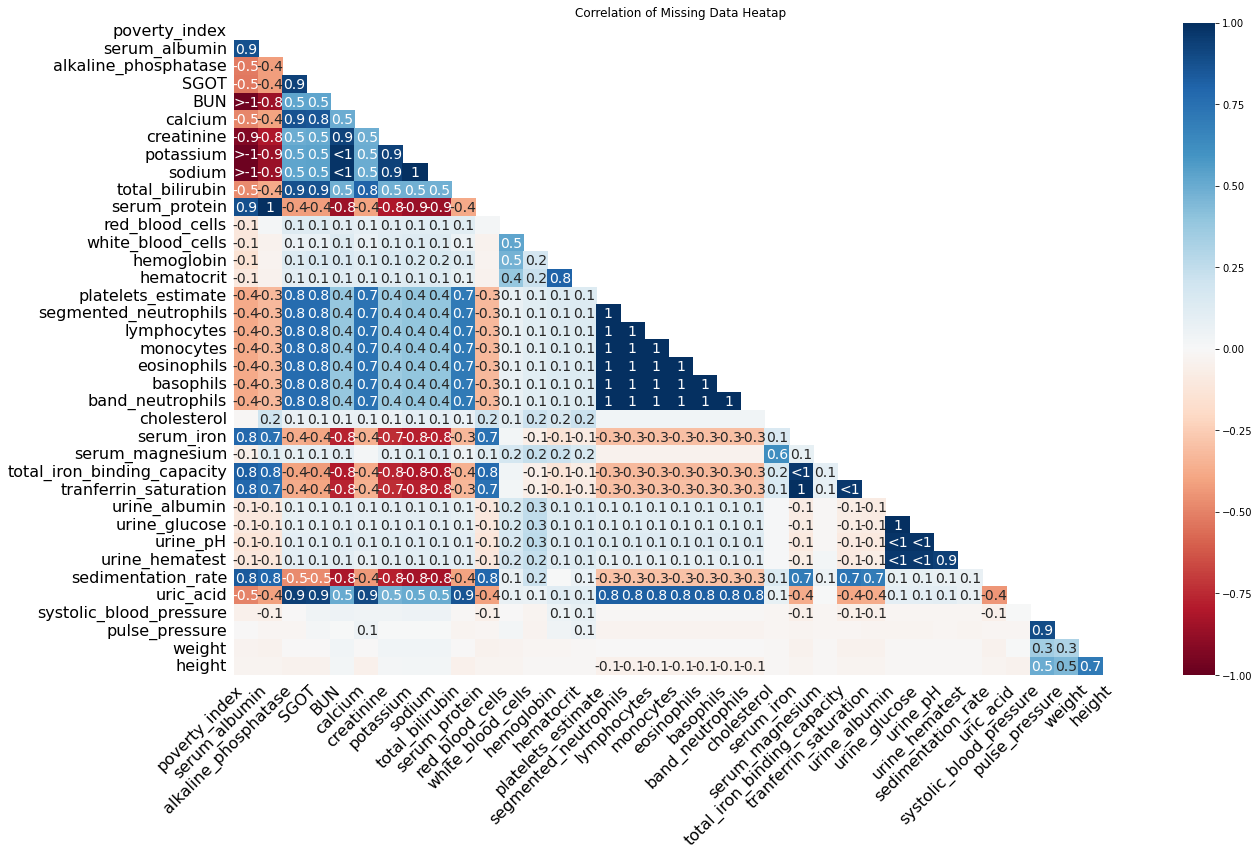

In [8]:
import missingno as msno
msno.heatmap(mortality.sample(500)).set(title='Correlation of Missing Data Heatap')
;

In [9]:
mortality_datatypes = pd.DataFrame(mortality.dtypes)
mortality_null_count = mortality.count()
print(mortality_datatypes.to_latex())
print(mortality_null_count.to_latex())

\begin{tabular}{ll}
\toprule
{} &        0 \\
\midrule
sequence\_ID                 &    int64 \\
sex\_isFemale                &     bool \\
race                        &    int64 \\
poverty\_index               &  float64 \\
age                         &    int64 \\
serum\_albumin               &  float64 \\
alkaline\_phosphatase        &  float64 \\
SGOT                        &  float64 \\
BUN                         &  float64 \\
calcium                     &  float64 \\
creatinine                  &  float64 \\
potassium                   &  float64 \\
sodium                      &  float64 \\
total\_bilirubin             &  float64 \\
serum\_protein               &  float64 \\
red\_blood\_cells             &  float64 \\
white\_blood\_cells           &  float64 \\
hemoglobin                  &  float64 \\
hematocrit                  &  float64 \\
platelets\_estimate          &   object \\
segmented\_neutrophils       &  float64 \\
lymphocytes                 &  float64 \\
monocyte

In [10]:
column_info = pd.concat([pd.DataFrame(mortality.dtypes), mortality.count()], axis=1)
display(column_info)
print(column_info.to_latex())

,0,0
sequence_ID,int64,14407
sex_isFemale,bool,14407
race,int64,14407
poverty_index,float64,11348
age,int64,14407
serum_albumin,float64,10801
alkaline_phosphatase,float64,6364
SGOT,float64,6315
BUN,float64,2935
calcium,float64,6256


\begin{tabular}{llr}
\toprule
{} &        0 &      0 \\
\midrule
sequence\_ID                 &    int64 &  14407 \\
sex\_isFemale                &     bool &  14407 \\
race                        &    int64 &  14407 \\
poverty\_index               &  float64 &  11348 \\
age                         &    int64 &  14407 \\
serum\_albumin               &  float64 &  10801 \\
alkaline\_phosphatase        &  float64 &   6364 \\
SGOT                        &  float64 &   6315 \\
BUN                         &  float64 &   2935 \\
calcium                     &  float64 &   6256 \\
creatinine                  &  float64 &   2591 \\
potassium                   &  float64 &   2992 \\
sodium                      &  float64 &   3003 \\
total\_bilirubin             &  float64 &   5854 \\
serum\_protein               &  float64 &  10800 \\
red\_blood\_cells             &  float64 &  10513 \\
white\_blood\_cells           &  float64 &  12959 \\
hemoglobin                  &  float64 &  13373 \\
hemato

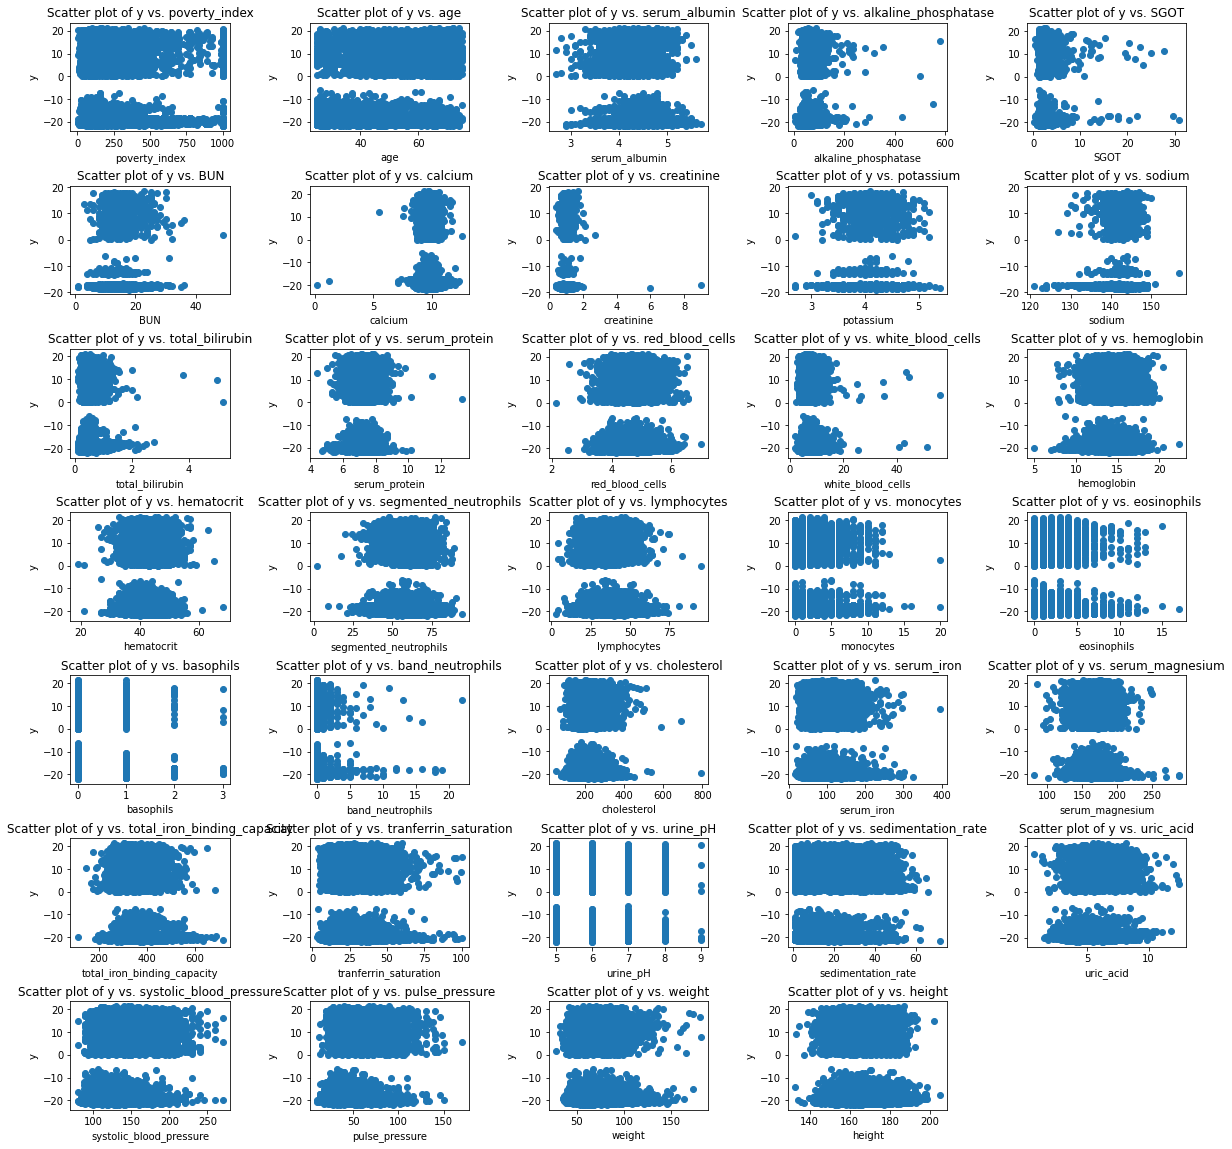

In [4]:
# Numerical predictors
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']
# y
y = mortality['y']
# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
# Put space between plots
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
# Go through each numertical predictor
for i, pred in enumerate(numerical):
    # Create a scatter plot of that predictor against y
    axes[i].scatter(x = mortality[pred], y = y)
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('y')
    axes[i].set_title(f'Scatter plot of y vs. {pred}')
# Delete the extra blank plot
fig.delaxes(axes[i+1])

plt.show()


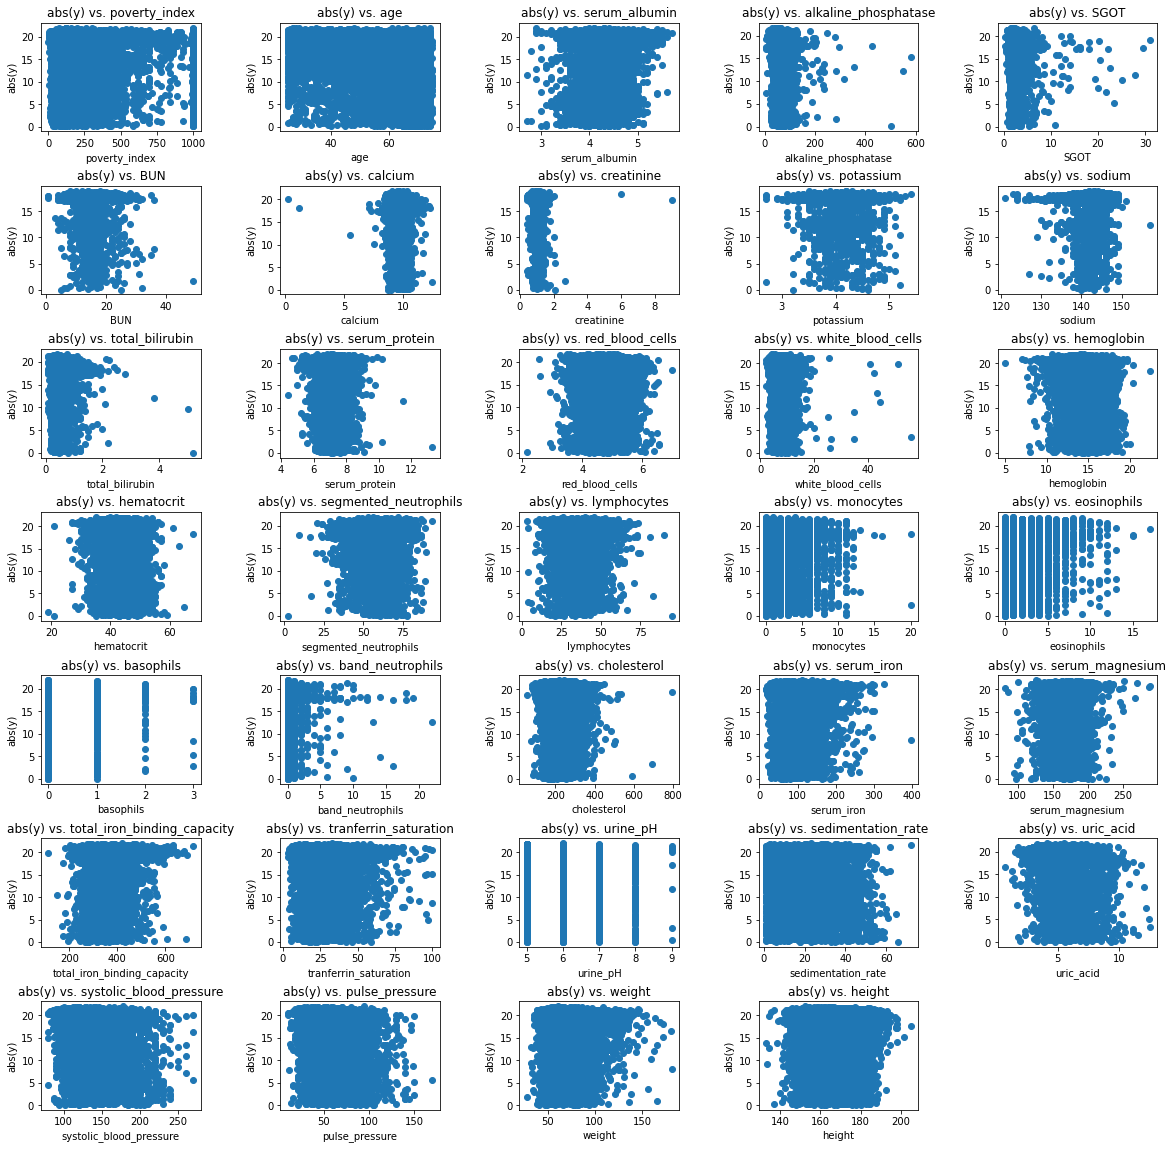

In [9]:
# Numerical predictors
numerical = ['poverty_index', 'age', 'serum_albumin', 'alkaline_phosphatase', 'SGOT', 'BUN', 'calcium', 'creatinine', 'potassium', 'sodium', 'total_bilirubin', 'serum_protein', 'red_blood_cells', 'white_blood_cells', 'hemoglobin', 'hematocrit', 'segmented_neutrophils', 'lymphocytes', 'monocytes', 'eosinophils', 'basophils', 'band_neutrophils', 'cholesterol', 'serum_iron', 'serum_magnesium', 'total_iron_binding_capacity', 'tranferrin_saturation', 'urine_pH', 'sedimentation_rate', 'uric_acid', 'systolic_blood_pressure', 'pulse_pressure', 'weight', 'height']
# Absolute value of y
y_abs = abs(mortality['y'])
mortality['abs_y'] = y_abs
# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
# Put space between plots
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
# Go through each numertical predictor
for i, pred in enumerate(numerical):
    # Create a scatter plot of that predictor against y
    axes[i].scatter(x = mortality[pred], y = y_abs)
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('abs(y)')
    axes[i].set_title(f'abs(y) vs. {pred}')
# Delete the extra blank plot
fig.delaxes(axes[i+1])

plt.show()


In [10]:
# Get the categorical columns
categorical = mortality.drop(columns=numerical+['sequence_ID','y', 'abs_y']).columns
print(categorical)

Index(['sex_isFemale', 'race', 'platelets_estimate', 'urine_albumin', 'urine_glucose', 'urine_hematest'], dtype='object')


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


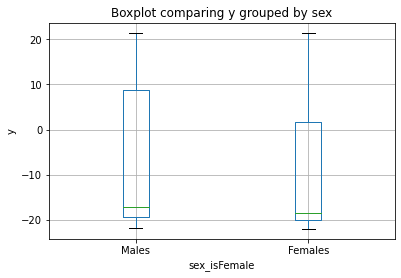

In [14]:
# Create a boxplot comparing years survived since the initial examination till death
# Grouped by males and females
axes = mortality.boxplot(column='y', by='sex_isFemale', return_type='axes')
axes[0].set_ylabel('y')
axes[0].set_xticklabels(['Males', 'Females'])
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by sex')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


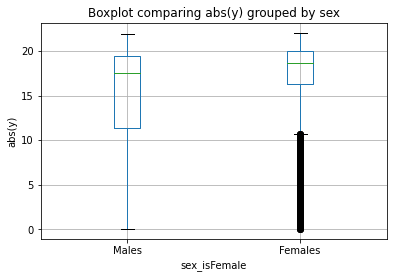

In [15]:
# Create a boxplot comparing absolute years survived since the initial examination till death
# Grouped by males and females
axes = mortality.boxplot(column='abs_y', by='sex_isFemale', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].set_xticklabels(['Males', 'Females'])
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by sex')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


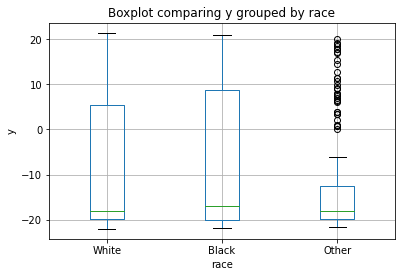

In [16]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by white, black, other, and unknown
axes = mortality.boxplot(column='y', by='race', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_xticklabels(['White', 'Black', 'Other'])
axes[0].set_title('Boxplot comparing y grouped by race')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


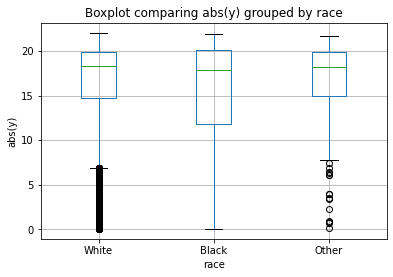

In [17]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by white, black, other, and unknown
axes = mortality.boxplot(column='abs_y', by='race', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_xticklabels(['White', 'Black', 'Other'])
axes[0].set_title('Boxplot comparing abs(y) grouped by race')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


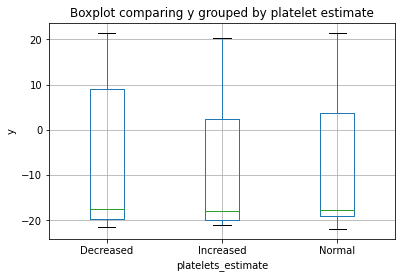

In [18]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by decreased platelet estimate, increased platelet estimate, and normal platelet estimte
axes = mortality.boxplot(column='y', by='platelets_estimate', return_type='axes')
axes[0].get_figure().suptitle('')
axes[0].set_ylabel('y')
axes[0].set_title('Boxplot comparing y grouped by platelet estimate')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


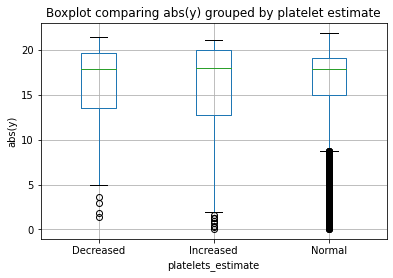

In [19]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by decreased platelet estimate, increased platelet estimate, and normal platelet estimte
axes = mortality.boxplot(column='abs_y', by='platelets_estimate', return_type='axes')
axes[0].get_figure().suptitle('')
axes[0].set_ylabel('abs(y)')
axes[0].set_title('Boxplot comparing abs(y) grouped by platelet estimate')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


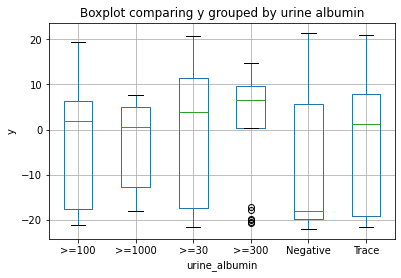

In [20]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine albumin levels
axes = mortality.boxplot(column='y', by='urine_albumin', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine albumin')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


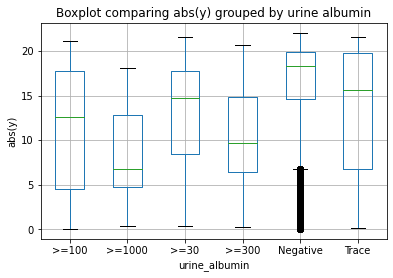

In [21]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine albumin levels
axes = mortality.boxplot(column='abs_y', by='urine_albumin', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine albumin')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


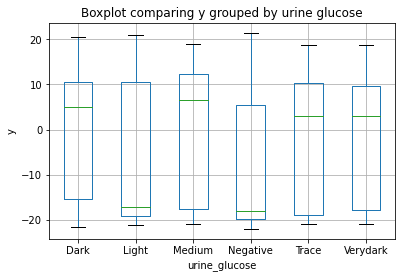

In [22]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine glucose levels
axes = mortality.boxplot(column='y', by='urine_glucose', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine glucose')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


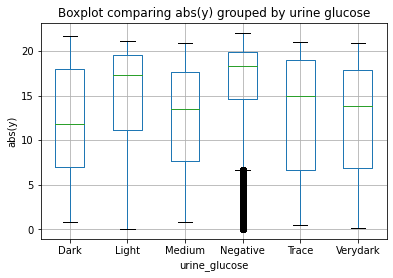

In [23]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine glucose levels
axes = mortality.boxplot(column='abs_y', by='urine_glucose', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine glucose')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


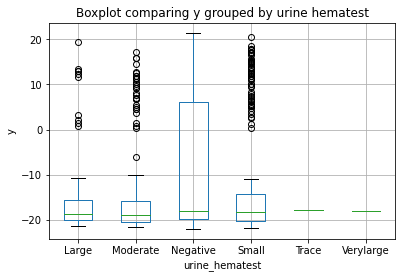

In [24]:
# Create a boxplot comparing years that survived since the initial examination till death
# Grouped by various urine hematest levels
axes = mortality.boxplot(column='y', by='urine_hematest', return_type='axes')
axes[0].set_ylabel('y')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing y grouped by urine hematest')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


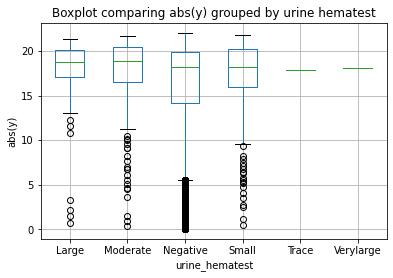

In [25]:
# Create a boxplot comparing absolute years that survived since the initial examination till death
# Grouped by various urine hematest levels
axes = mortality.boxplot(column='abs_y', by='urine_hematest', return_type='axes')
axes[0].set_ylabel('abs(y)')
axes[0].get_figure().suptitle('')
axes[0].set_title('Boxplot comparing abs(y) grouped by urine hematest')
plt.show()

In [26]:
#pairplot (takes 15min to finish)
# Creates a scatterplot for each pair of numerical predictors
# sns.pairplot(mortality[numerical], corner=True)

In [27]:
# List to store combinations of predictors/response
pred_combos = []
# Get correlation matrix
correlations = mortality.corr()
# Get all the column names in our correlation matrix
column_names = correlations.columns
count = 0
# Go through each colmn
for i in range(len(column_names)):
    col = column_names[i]
    for j in range(i,len(column_names)):
        row = column_names[j]
        # Check if the correlation between the response and predictor
        # or correlation between two predictors is above 0.6
        if abs(correlations[row][col]) > 0.6 and col != row:
            # Store that combination and correlation
            pred_combos.append((row, col, correlations[row][col]))
display(correlations)

,sequence_ID,sex_isFemale,race,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,total_iron_binding_capacity,tranferrin_saturation,urine_pH,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,y,abs_y
sequence_ID,1.000,-0.023,-1.492e-01,-0.021,-0.075,0.010,0.070,3.783e-02,0.022,0.019,6.171e-02,-0.032,-2.023e-01,0.208,-0.093,0.071,3.055e-02,-6.770e-02,-0.071,-0.005,-6.426e-02,0.273,-4.009e-02,0.110,-7.278e-03,-0.003,-0.022,6.451e-02,0.004,-0.026,-2.088e-01,-0.264,0.034,-7.592e-02,-1.107e-01,0.014,0.059,-9.111e-02,-0.056
sex_isFemale,-0.023,1.000,1.647e-02,-0.064,-0.136,-0.118,-0.080,-1.650e-01,-0.245,-0.076,-3.395e-01,-0.140,-8.127e-02,-0.234,0.002,-0.454,-2.578e-02,-5.654e-01,-0.551,0.001,3.555e-02,-0.060,-9.066e-02,-0.007,-3.576e-03,0.005,-0.108,-8.559e-02,0.180,-0.165,2.909e-02,0.272,-0.465,-8.259e-02,-1.526e-02,-0.346,-0.674,-1.619e-01,0.187
race,-0.149,0.016,1.000e+00,-0.152,-0.008,-0.088,0.034,7.269e-02,-0.075,0.030,-1.688e-02,-0.004,9.604e-05,-0.056,0.219,-0.075,-1.008e-01,-1.759e-01,-0.120,-0.163,1.779e-01,-0.038,8.324e-03,-0.026,-3.496e-02,-0.017,-0.076,-1.360e-01,-0.021,-0.063,3.069e-02,0.181,0.064,9.968e-02,5.192e-02,0.045,-0.050,5.189e-02,-0.056
poverty_index,-0.021,-0.064,-1.517e-01,1.000,-0.038,0.073,-0.058,-2.153e-02,NaN,-0.007,NaN,NaN,NaN,0.022,-0.097,0.043,5.866e-03,8.699e-02,0.068,0.024,-2.819e-02,0.021,9.045e-03,-0.009,-1.485e-02,0.019,0.088,3.759e-02,-0.022,0.086,2.477e-03,-0.130,0.011,-9.401e-02,-7.972e-02,-0.019,0.110,-7.689e-02,0.100
age,-0.075,-0.136,-7.883e-03,-0.038,1.000,-0.208,0.194,3.988e-02,0.339,-0.049,1.413e-01,0.090,5.840e-02,-0.047,-0.039,0.021,-7.152e-02,7.415e-02,0.102,0.014,-7.539e-03,-0.029,1.684e-02,-0.030,-1.710e-02,0.347,-0.017,7.878e-02,-0.252,0.081,-5.962e-02,0.202,0.145,5.059e-01,4.999e-01,0.038,-0.121,5.540e-01,-0.453
serum_albumin,0.010,-0.118,-8.802e-02,0.073,-0.208,1.000,-0.101,2.728e-02,NaN,0.370,NaN,NaN,NaN,0.121,0.445,0.203,1.038e-02,2.508e-01,0.217,-0.016,6.014e-03,0.068,-3.178e-02,0.021,1.511e-02,0.068,0.112,1.684e-01,0.126,0.044,1.587e-02,-0.254,0.119,-6.357e-02,-9.877e-02,0.026,0.126,-1.462e-01,0.171
alkaline_phosphatase,0.070,-0.080,3.396e-02,-0.058,0.194,-0.101,1.000,1.746e-01,0.028,0.006,4.410e-02,0.040,-5.335e-03,0.106,0.102,0.075,7.619e-02,7.219e-02,0.086,0.042,-5.759e-02,0.049,7.420e-03,0.012,3.219e-03,0.103,-0.027,1.227e-02,-0.018,-0.017,-2.009e-02,0.133,0.134,1.770e-01,1.383e-01,0.107,-0.014,1.760e-01,-0.177
SGOT,0.038,-0.165,7.269e-02,-0.022,0.040,0.027,0.175,1.000e+00,0.057,0.065,4.323e-02,0.006,2.512e-02,0.203,0.142,0.075,6.614e-03,1.177e-01,0.123,-0.031,2.292e-02,0.035,-1.149e-02,0.023,-7.797e-04,0.030,0.165,-6.169e-02,0.036,0.135,-1.937e-02,0.004,0.190,9.112e-02,3.933e-02,0.095,0.111,8.978e-02,-0.089
BUN,0.022,-0.245,-7.466e-02,NaN,0.339,NaN,0.028,5.695e-02,1.000,0.074,3.154e-01,0.123,9.648e-02,0.037,NaN,0.114,-2.731e-02,1.326e-01,0.126,-0.027,-1.842e-03,0.064,7.203e-02,-0.004,-3.611e-02,0.170,NaN,9.651e-02,NaN,NaN,-6.045e-02,NaN,0.286,1.710e-01,1.472e-01,0.169,0.104,1.294e-01,-0.122
calcium,0.019,-0.076,2.961e-02,-0.007,-0.049,0.370,0.006,6.522e-02,0.074,1.000,7.793e-02,0.061,1.805e-01,0.091,0.288,0.183,8.797e-02,1.843e-01,0.176,-0.026,2.161e-02,0.023,-1.213e-02,0.006,-2.226e-03,0.169,0.054,7.743e-02,0.161,-0.027,1.911e-02,-0.054,0.129,4.367e-02,-8.637e-03,0.050,0.068,-8.853e-03,-0.003


Correlation of sex_isFemale vs height: -0.6740098473164745
Correlation of red_blood_cells vs hemoglobin: 0.6997393116618635
Correlation of red_blood_cells vs hematocrit: 0.7444551216146654
Correlation of hemoglobin vs hematocrit: 0.9154147576551465
Correlation of segmented_neutrophils vs lymphocytes: -0.9253751215513111
Correlation of serum_iron vs tranferrin_saturation: 0.9055657333870066
Correlation of systolic_blood_pressure vs pulse_pressure: 0.8520625460846935
Correlation of y vs abs_y: -0.6170634939773824


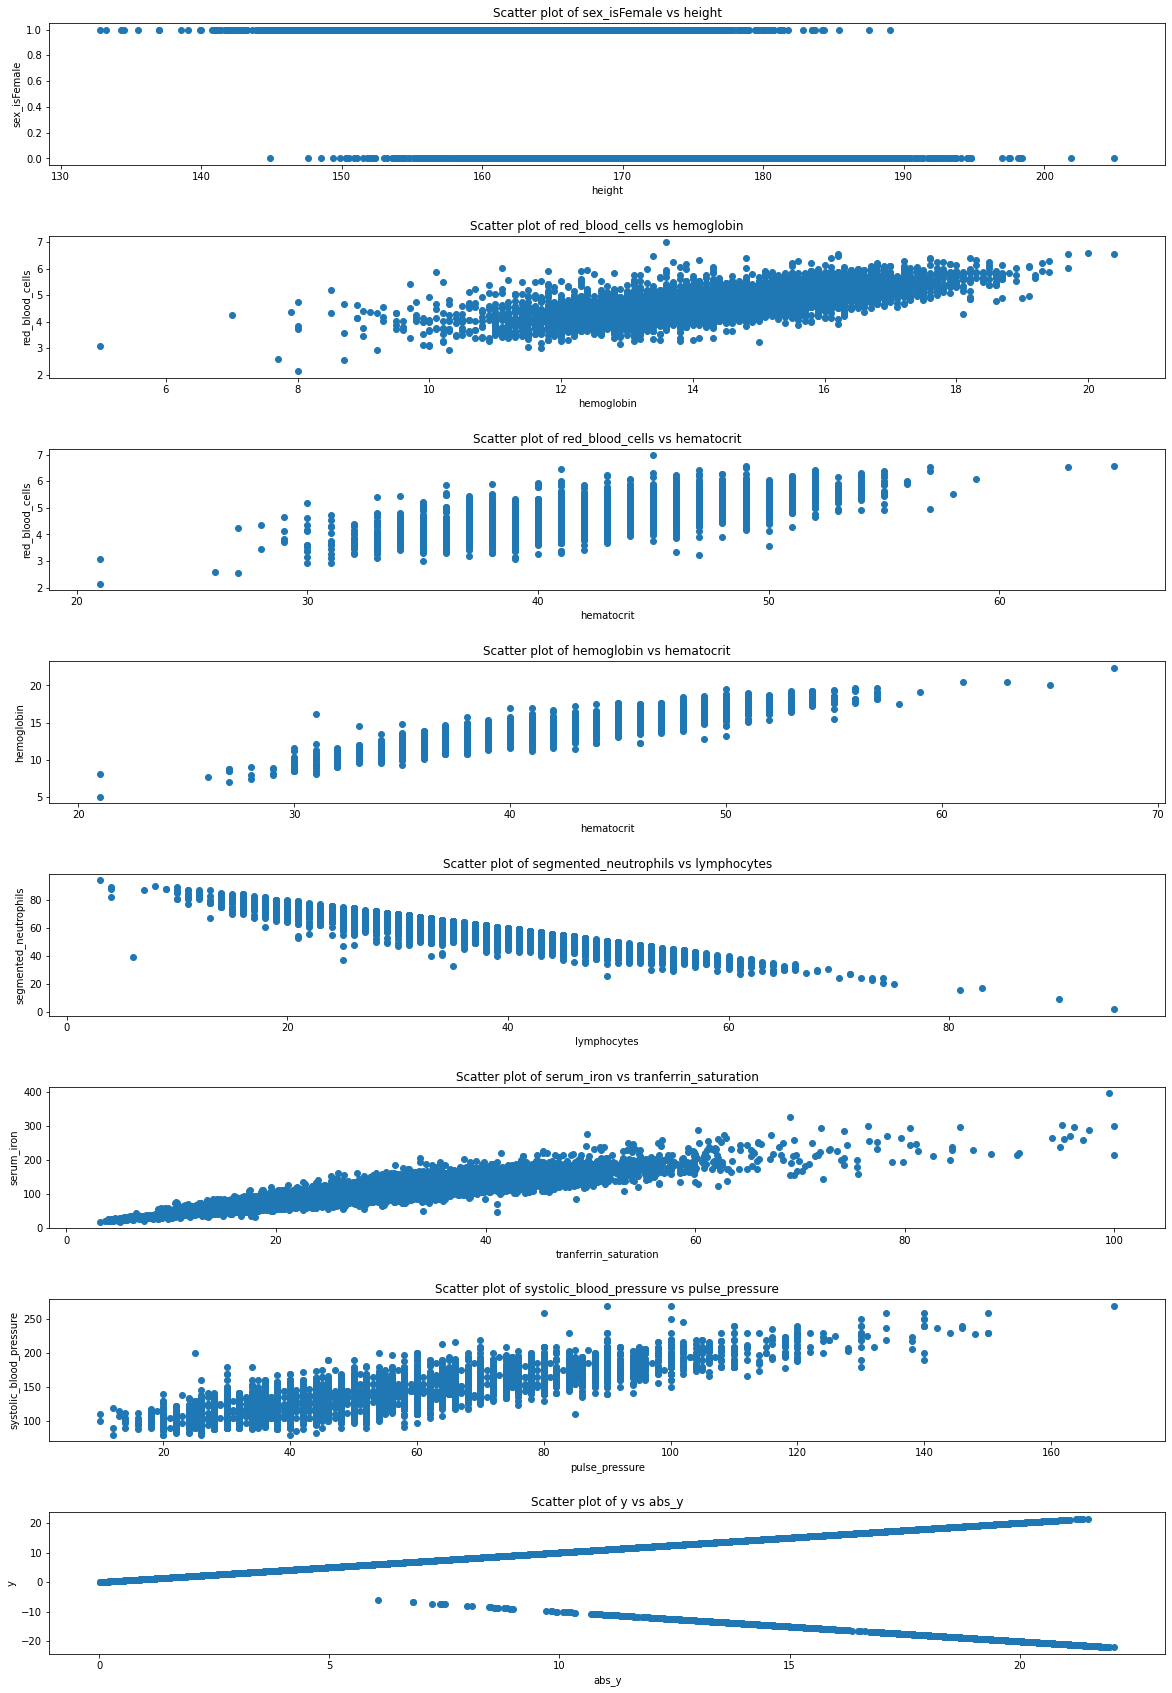

In [28]:
# Create plots
fig, axes = plt.subplots(len(pred_combos),figsize=(20,30))
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
for i, combo in enumerate(pred_combos):
    # Get the column names 
    var_1 = combo[0]
    var_2 = combo[1]
    # Print out the corresponding correlation
    print(f"Correlation of {var_2} vs {var_1}: {combo[2]}")
    # Output a scatter plot of the combination
    axes[i].scatter(x=mortality[var_1], y=mortality[var_2])
    # Label
    axes[i].set_xlabel(var_1)
    axes[i].set_ylabel(var_2)
    axes[i].set_title(f'Scatter plot of {var_2} vs {var_1}')

plt.show()


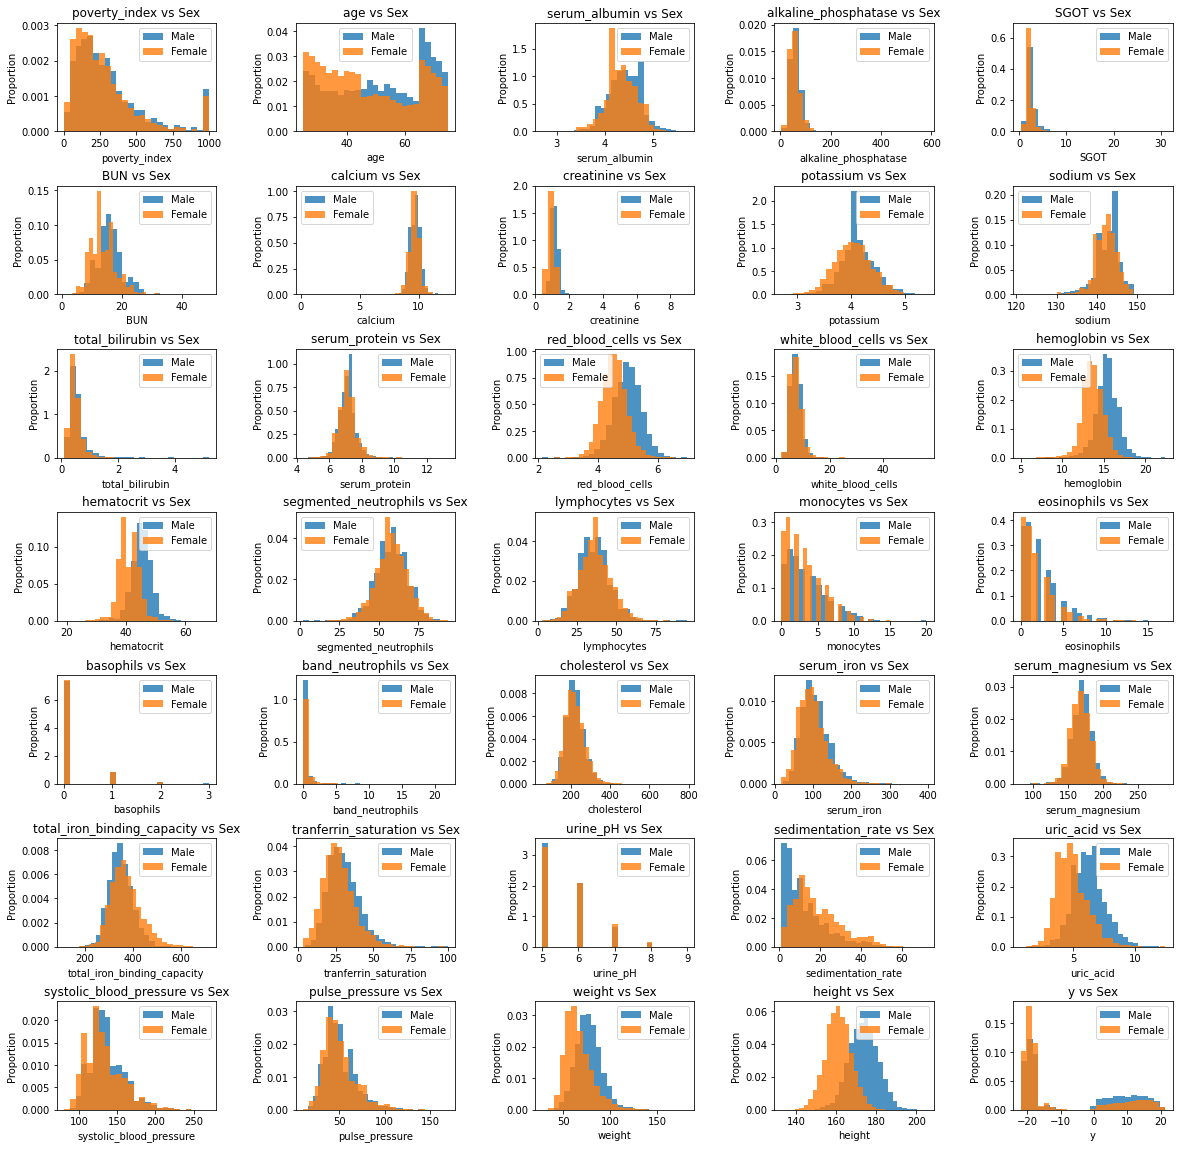

In [29]:
# Create plots
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
fig.subplots_adjust(hspace = 0.5, wspace=0.5)

# Go through all the numerical predictors along with y
for i, pred in enumerate((mortality[numerical+['y']]).columns):
    # Plot histograms for that predictor for males
    axes[i].hist(mortality[mortality['sex_isFemale'] == 0][pred], density=True, bins=25, alpha=0.8, label='Male')
    # Plot histograms for that predictor for females
    axes[i].hist(mortality[mortality['sex_isFemale'] == 1][pred], density=True, bins=25, alpha=0.8, label='Female')
    # Label
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'{pred} vs Sex')
    axes[i].legend()

plt.show()

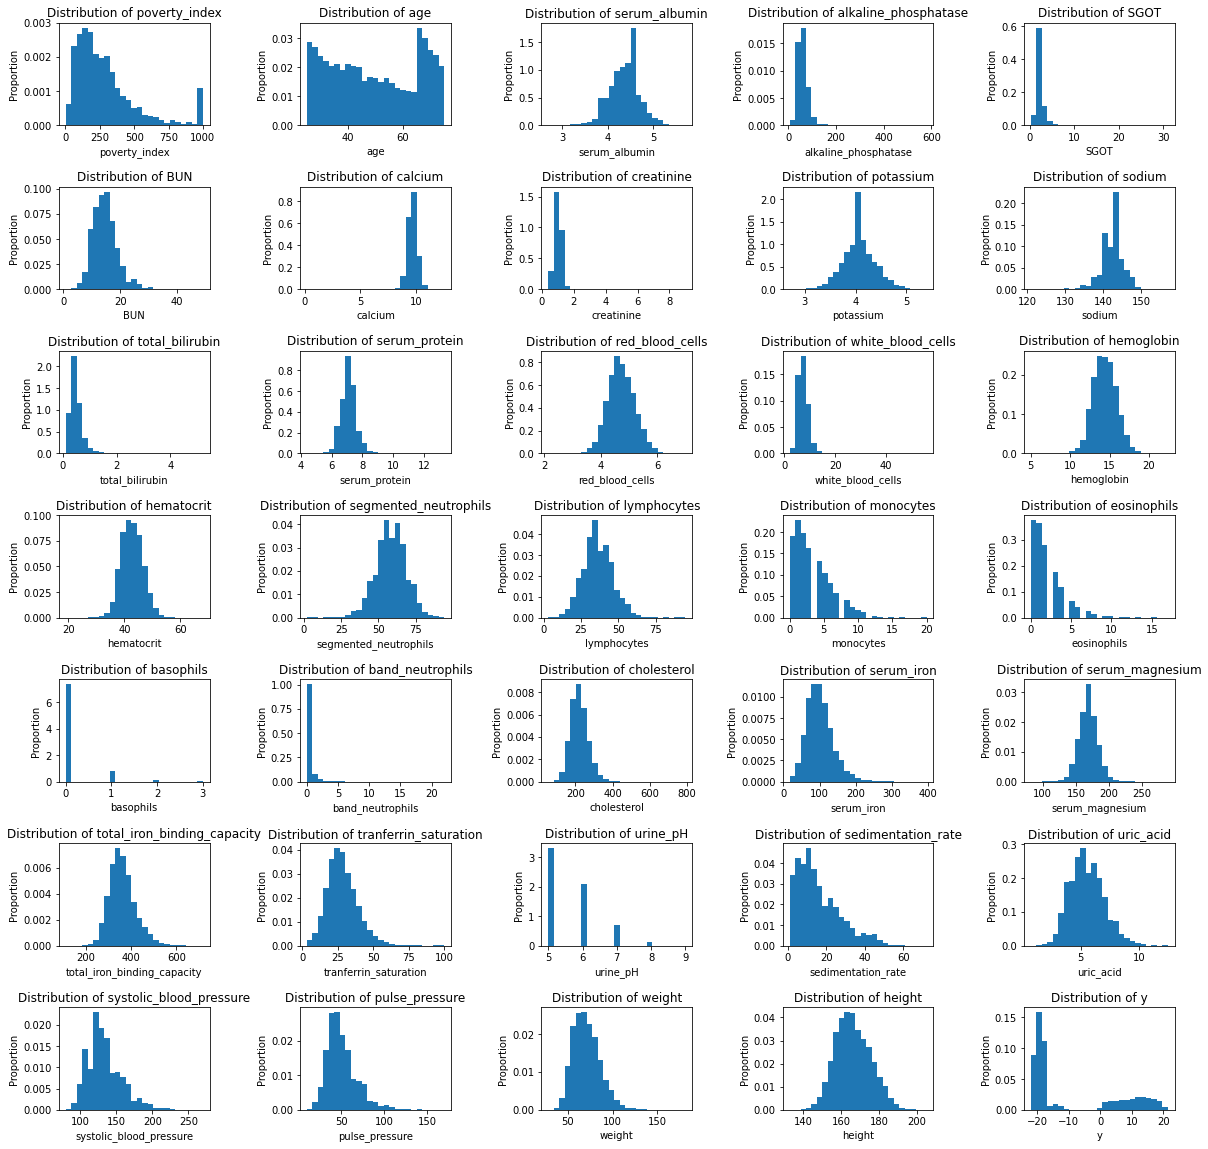

In [30]:
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
fig.subplots_adjust(hspace = 0.6, wspace=0.6)

for i, pred in enumerate((mortality[numerical+['y']]).columns):
    axes[i].hist(mortality[pred], density=True, bins=25)
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'Distribution of {pred}')

plt.show()

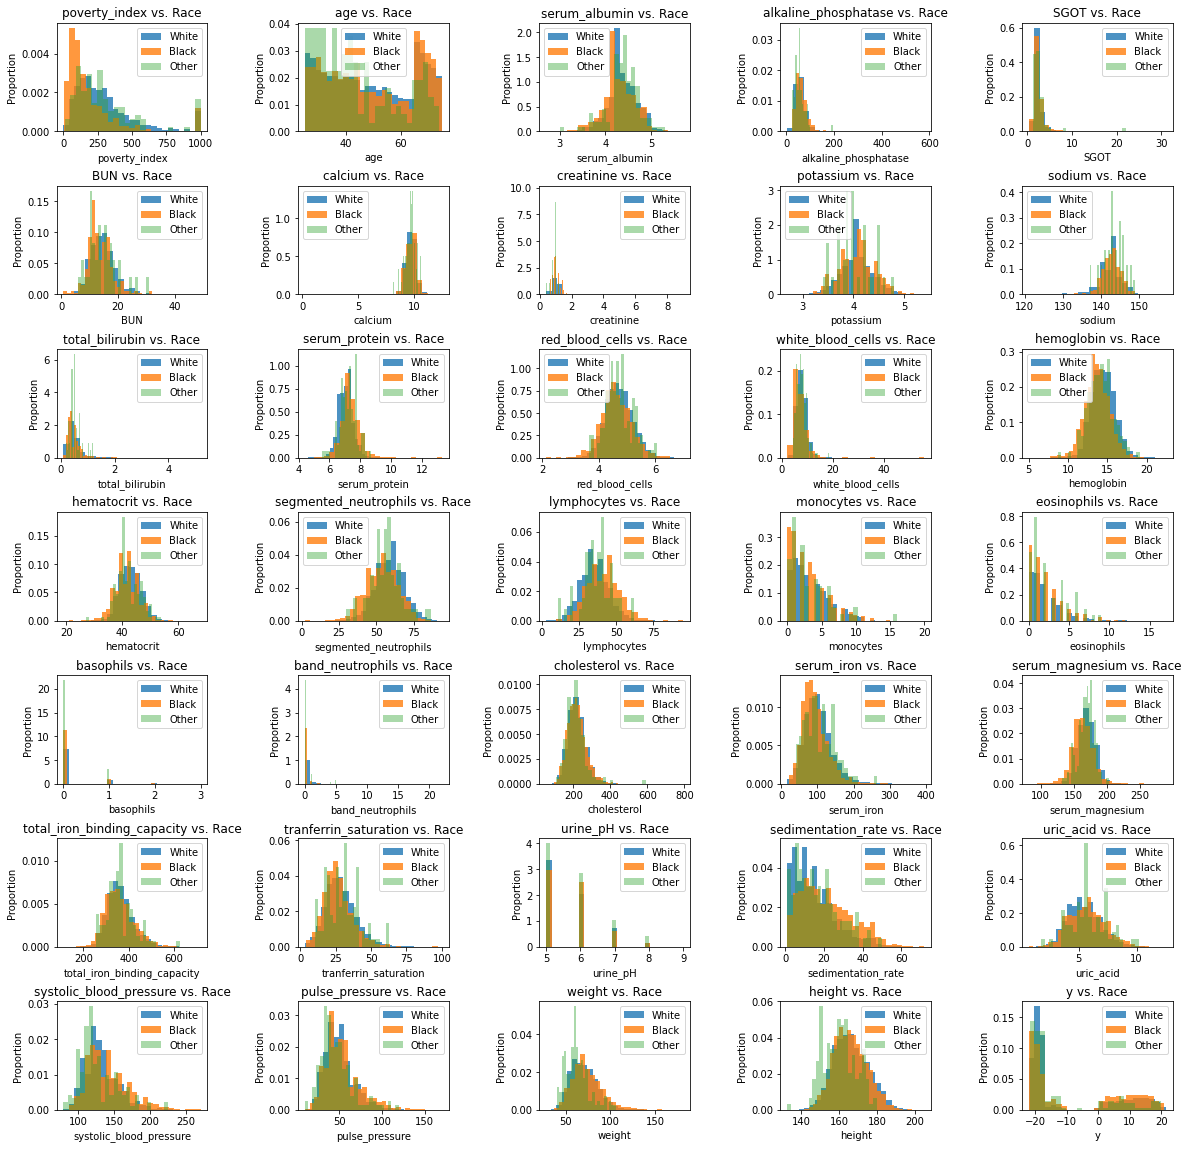

In [31]:
fig, axes = plt.subplots(7,5, figsize=(20, 20))
axes = axes.flatten().tolist()
fig.subplots_adjust(hspace = 0.5, wspace=0.6)

for i, pred in enumerate((mortality[numerical+['y']]).columns):
    axes[i].hist(mortality[mortality['race'] == 1][pred], density=True, bins=25, alpha=0.8, label='White')
    axes[i].hist(mortality[mortality['race'] == 2][pred], density=True, bins=25, alpha=0.8, label='Black')
    axes[i].hist(mortality[mortality['race'] == 3][pred], density=True, bins=25, alpha=0.4, label='Other')
    axes[i].set_xlabel(pred)
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'{pred} vs. Race')
    axes[i].legend()

plt.show()

In [11]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

In [12]:
encoded_df = mortality.copy(deep=True)

In [13]:
print(categorical)

Index(['sex_isFemale', 'race', 'platelets_estimate', 'urine_albumin', 'urine_glucose', 'urine_hematest'], dtype='object')


In [14]:
encoded_sex = pd.get_dummies(encoded_df["sex_isFemale"], drop_first=True).rename({1: 'is_female'}, axis=1)
encoded_race = pd.get_dummies(encoded_df["race"]).rename({1: 'is_white', 2: 'is_black', 3:'is_other'}, axis=1)
encoded_platelets = pd.get_dummies(encoded_df["platelets_estimate"]).rename({'Decreased': 'decreased_platelets', 'Increased': 'increased_platelets', 'Normal':'normal_platelets'}, axis=1)
encoded_ualbumin = pd.get_dummies(encoded_df["urine_albumin"]).rename({'>=100': 'ualbumin_100', '>=1000': 'ualbumin_1000', '>=30':'ualbumin_30', '>=300':'ualbumin_300', 'Negative':'ualbumin_negative', 'Trace':'ualbumin_trace'}, axis=1)

labels = {}
for shade in pd.get_dummies(encoded_df["urine_glucose"]).columns:
    labels[shade] = 'uglucose_' + shade.lower()
encoded_uglucose = pd.get_dummies(encoded_df["urine_glucose"]).rename(labels, axis=1)

labels = {}
for size in pd.get_dummies(encoded_df["urine_hematest"]).columns:
    labels[size] = 'uhematest_' + size.lower()
encoded_uhematest = pd.get_dummies(encoded_df["urine_hematest"]).rename(labels, axis=1)


In [15]:
encoded_df = pd.concat([encoded_df, encoded_sex, encoded_race, encoded_platelets, encoded_ualbumin, encoded_uhematest], axis=1)
encoded_df.drop(columns=categorical,inplace=True)
encoded_df.drop(columns=["sequence_ID", "y", "abs_y"],inplace=True)

In [16]:
display(encoded_df.head())

,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,...,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,is_female,is_white,is_black,is_other,decreased_platelets,increased_platelets,normal_platelets,ualbumin_100,ualbumin_1000,ualbumin_30,ualbumin_300,ualbumin_negative,ualbumin_trace,uhematest_large,uhematest_moderate,uhematest_negative,uhematest_small,uhematest_trace,uhematest_verylarge
0,NaN,51,NaN,85.0,NaN,16.0,10.1,1.0,4.1,140.0,0.5,NaN,5.48,10.1,16.0,49.0,70.0,26.0,1.0,3.0,0.0,0.0,256.0,NaN,182.0,...,NaN,6.2,110.0,40.0,84.25,182.1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,NaN,41,NaN,68.0,2.27,16.0,10.2,0.9,4.4,142.0,0.9,NaN,4.62,6.3,14.1,42.0,54.0,35.0,2.0,8.0,1.0,0.0,254.0,NaN,159.0,...,NaN,7.7,136.0,54.0,87.09,188.2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,NaN,31,NaN,61.0,1.86,10.0,9.6,0.6,3.9,139.0,0.3,NaN,4.26,7.8,12.0,38.0,56.0,37.0,2.0,5.0,0.0,0.0,177.0,NaN,160.0,...,NaN,4.9,110.0,24.0,60.21,159.2,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,NaN,48,NaN,58.0,NaN,12.0,9.7,1.1,4.2,142.0,0.8,NaN,4.71,5.1,12.7,40.0,54.0,33.0,4.0,8.0,1.0,0.0,209.0,NaN,153.0,...,NaN,8.4,126.0,36.0,88.22,175.6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,NaN,29,NaN,37.0,1.69,19.0,9.3,1.1,4.2,140.0,0.7,NaN,4.23,5.2,12.3,40.0,65.0,34.0,1.0,0.0,0.0,0.0,206.0,NaN,156.0,...,NaN,4.3,98.0,36.0,51.37,163.5,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [17]:
for col in numerical:
  encoded_df[col].fillna(encoded_df[col].mean(), inplace=True)
  
for col in encoded_df.drop(columns=numerical).columns:
  print(col, encoded_df[col].mode())

for col in encoded_df.drop(columns=numerical).columns:
  encoded_df[col].fillna(encoded_df[col].mode(), inplace=True)

is_female 0    1
dtype: uint8
is_white 0    1
dtype: uint8
is_black 0    0
dtype: uint8
is_other 0    0
dtype: uint8
decreased_platelets 0    0
dtype: uint8
increased_platelets 0    0
dtype: uint8
normal_platelets 0    0
dtype: uint8
ualbumin_100 0    0
dtype: uint8
ualbumin_1000 0    0
dtype: uint8
ualbumin_30 0    0
dtype: uint8
ualbumin_300 0    0
dtype: uint8
ualbumin_negative 0    1
dtype: uint8
ualbumin_trace 0    0
dtype: uint8
uhematest_large 0    0
dtype: uint8
uhematest_moderate 0    0
dtype: uint8
uhematest_negative 0    1
dtype: uint8
uhematest_small 0    0
dtype: uint8
uhematest_trace 0    0
dtype: uint8
uhematest_verylarge 0    0
dtype: uint8


In [18]:
display(encoded_df.head())

,poverty_index,age,serum_albumin,alkaline_phosphatase,SGOT,BUN,calcium,creatinine,potassium,sodium,total_bilirubin,serum_protein,red_blood_cells,white_blood_cells,hemoglobin,hematocrit,segmented_neutrophils,lymphocytes,monocytes,eosinophils,basophils,band_neutrophils,cholesterol,serum_iron,serum_magnesium,...,sedimentation_rate,uric_acid,systolic_blood_pressure,pulse_pressure,weight,height,is_female,is_white,is_black,is_other,decreased_platelets,increased_platelets,normal_platelets,ualbumin_100,ualbumin_1000,ualbumin_30,ualbumin_300,ualbumin_negative,ualbumin_trace,uhematest_large,uhematest_moderate,uhematest_negative,uhematest_small,uhematest_trace,uhematest_verylarge
0,285.289,51,4.36,85.0,2.429,16.0,10.1,1.0,4.1,140.0,0.5,7.106,5.48,10.1,16.0,49.0,70.0,26.0,1.0,3.0,0.0,0.0,256.0,101.122,182.0,...,16.182,6.2,110.0,40.0,84.25,182.1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,285.289,41,4.36,68.0,2.270,16.0,10.2,0.9,4.4,142.0,0.9,7.106,4.62,6.3,14.1,42.0,54.0,35.0,2.0,8.0,1.0,0.0,254.0,101.122,159.0,...,16.182,7.7,136.0,54.0,87.09,188.2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,285.289,31,4.36,61.0,1.860,10.0,9.6,0.6,3.9,139.0,0.3,7.106,4.26,7.8,12.0,38.0,56.0,37.0,2.0,5.0,0.0,0.0,177.0,101.122,160.0,...,16.182,4.9,110.0,24.0,60.21,159.2,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,285.289,48,4.36,58.0,2.429,12.0,9.7,1.1,4.2,142.0,0.8,7.106,4.71,5.1,12.7,40.0,54.0,33.0,4.0,8.0,1.0,0.0,209.0,101.122,153.0,...,16.182,8.4,126.0,36.0,88.22,175.6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,285.289,29,4.36,37.0,1.690,19.0,9.3,1.1,4.2,140.0,0.7,7.106,4.23,5.2,12.3,40.0,65.0,34.0,1.0,0.0,0.0,0.0,206.0,101.122,156.0,...,16.182,4.3,98.0,36.0,51.37,163.5,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [19]:
# Identify predictor and response variables
X = encoded_df
y = mortality['y']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_seed)

In [20]:
# EXPERIMENTATIONNN
X_train_neg = X_train.iloc[np.where(y_train < 0)]
y_train_neg = y_train.iloc[np.where(y_train < 0)]
X_test_neg = X_test.iloc[np.where(y_test < 0)]
y_test_neg = y_test.iloc[np.where(y_test < 0)]

X_train_pos = X_train.iloc[np.where(y_train >= 0)]
y_train_pos = y_train.iloc[np.where(y_train >= 0)]
X_test_pos = X_test.iloc[np.where(y_test >= 0)]
y_test_pos = y_test.iloc[np.where(y_test >= 0)]

In [170]:
def multiLinear(X_train, X_test, y_train, y_test):
    # Baseline multiple linear regression model (we will use more complex methods later on)
    regression_baseline = LinearRegression()
    regression_baseline.fit(X_train, y_train)

    y_pred_train = regression_baseline.predict(X_train)
    y_pred_test = regression_baseline.predict(X_test)

    train_score = mean_squared_error(y_train, y_pred_train)
    test_score = mean_squared_error(y_test, y_pred_test)

    print(f"MSE score on the training set is {train_score:.4f}")
    print(f"MSE score on the test set is {test_score:.4f}")

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"R-squared score on the training set is {r2_train:.4f}")
    print(f"R-squared score on the test set is {r2_test:.4f}")

# With encoding
multiLinear(X_train, X_test, y_train, y_test)
print('\n')
# With encoding, with abs
multiLinear(X_train, X_test, abs(y_train), abs(y_test))
print('\n')
# Without encoding
multiLinear(X_train[numerical], X_test[numerical], y_train, y_test)
print('\n')
# Without encoding, with abs
multiLinear(X_train[numerical], X_test[numerical], abs(y_train), abs(y_test))
print('\n')
# With encoding, positive only
multiLinear(X_train_pos, X_test_pos, y_train_pos, y_test_pos)
print('\n')
# With encoding, negative only
multiLinear(X_train_neg, X_test_neg, y_train_neg, y_test_neg)
print('\n')

MSE score on the training set is 136.4961
MSE score on the test set is 134.0373
R-squared score on the training set is 0.3428
R-squared score on the test set is 0.3485


MSE score on the training set is 19.8419
MSE score on the test set is 20.5815
R-squared score on the training set is 0.2823
R-squared score on the test set is 0.2560


MSE score on the training set is 138.3707
MSE score on the test set is 135.4583
R-squared score on the training set is 0.3338
R-squared score on the test set is 0.3416


MSE score on the training set is 20.5187
MSE score on the test set is 20.9626
R-squared score on the training set is 0.2578
R-squared score on the test set is 0.2422


MSE score on the training set is 27.4117
MSE score on the test set is 30.2584
R-squared score on the training set is 0.0904
R-squared score on the test set is 0.0283


MSE score on the training set is 3.1161
MSE score on the test set is 3.1083
R-squared score on the training set is 0.1248
R-squared score on the test set is

In [171]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def decisionTree(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    tree = DecisionTreeRegressor()
    tree.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_train, tree.predict(X_train_scaled)))
    print(mean_squared_error(y_test, tree.predict(X_test_scaled)))

# With encoding
decisionTree(X_train, X_test, y_train, y_test)
print('\n')
# With encoding, with abs
decisionTree(X_train, X_test, abs(y_train), abs(y_test))
print('\n')
# Without encoding
decisionTree(X_train[numerical], X_test[numerical], y_train, y_test)
print('\n')
# Without encoding, with abs
decisionTree(X_train[numerical], X_test[numerical], abs(y_train), abs(y_test))
print('\n')
# With encoding, positive only
decisionTree(X_train_pos, X_test_pos, y_train_pos, y_test_pos)
print('\n')
# With encoding, negative only
decisionTree(X_train_neg, X_test_neg, y_train_neg, y_test_neg)
print('\n')

2.8474285168931965e-32
270.1609367209518


2.5188790726362893e-32
39.91330318994526


4.5449339788872177e-32
272.1821519288384


5.366307589529486e-32
40.90186989842858


0.0
58.70023610086679


2.627141820431625e-32
5.254726143992244




In [21]:
from sklearn.ensemble import RandomForestRegressor

def randomForest(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  model = RandomForestRegressor(n_estimators=30, random_state=0)
  model.fit(X_train_scaled, y_train)
  print(mean_squared_error(y_train, model.predict(X_train_scaled)))
  print(mean_squared_error(y_test, model.predict(X_test_scaled)))

  feature_list = list(X_train.columns)
  feature_importance = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
  print(feature_importance)

# With encoding
randomForest(X_train, X_test, y_train, y_test)
print('\n')
# With encoding, with abs
randomForest(X_train, X_test, abs(y_train), abs(y_test))
print('\n')
# Without encoding
randomForest(X_train[numerical], X_test[numerical], y_train, y_test)
print('\n')
# Without encoding, with abs
randomForest(X_train[numerical], X_test[numerical], abs(y_train), abs(y_test))
print('\n')
# With encoding, positive only
randomForest(X_train_pos, X_test_pos, y_train_pos, y_test_pos)
print('\n')
# With encoding, negative only
randomForest(X_train_neg, X_test_neg, y_train_neg, y_test_neg)
print('\n')

21.0602239503044
136.38512258278962
age                            3.501e-01
cholesterol                    3.803e-02
weight                         3.762e-02
poverty_index                  3.691e-02
height                         3.580e-02
serum_magnesium                3.440e-02
systolic_blood_pressure        3.221e-02
white_blood_cells              3.176e-02
sedimentation_rate             2.951e-02
red_blood_cells                2.853e-02
hemoglobin                     2.787e-02
total_iron_binding_capacity    2.672e-02
pulse_pressure                 2.623e-02
tranferrin_saturation          2.612e-02
serum_protein                  2.470e-02
serum_iron                     2.430e-02
serum_albumin                  2.165e-02
hematocrit                     1.777e-02
alkaline_phosphatase           1.565e-02
SGOT                           1.376e-02
uric_acid                      1.193e-02
is_female                      1.058e-02
calcium                        9.509e-03
urine_pH             

In [174]:
import tensorflow as tf
from sklearn.preprocessing import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

In [187]:
def deepNNet(X_train, X_test, y_train, y_test, epochs):
    # Normalize the training and test data
    # Normalizing the data generally speeds up learning and leads to faster convergence.
    X_train_norm = normalize(X_train)
    X_test_norm = normalize(X_test)
    # Without encoding
    # Sequential models are models where we define our layers one after another
    deepnn = Sequential()
    # The output of one layer serves as the input for the next
    # We are adding three layers of neurons 
    # The activation function is ReLU, Rectified Linear Units
    # This takes all the values and normalizes them on a scale from 0 to 1
    # The ReLU algorithm basically assigns a value to either 0 or 1, depending which it is closer to
    # There will be 53 neurons in this layer 
    # Since this is the input layer, we want the input shape to be the number of columns we have
    deepnn.add(Dense(53, activation="relu", input_shape=(X_train_norm[0].shape)))
    # There will be 53 neurons in this layer 
    deepnn.add(Dense(53, activation="relu"))
    # There will be 1 neuron in this layer since we want to output a single value as the prediction
    deepnn.add(Dense(1))
    # Now we want to compile our model
    # The optimizer will be adam and the loss function will be mean squared error
    deepnn.compile(optimizer="adam", loss="mse", metrics=["mse"])

    num_epochs = 100
    # Now we want to fit our model on the training data over 100 epochs
    # Verbose will just output the metrics after each round of training
    # Validation data is the data on which to evaluate model metrics at the end of each epoch
    # The model will not be trained on this data
    logs = deepnn.fit(X_train_norm, y_train, epochs=epochs, batch_size=32, verbose=True, validation_data=(X_test_norm, y_test))

    print(deepnn.evaluate(X_train_norm, y_train))
    print(deepnn.evaluate(X_test_norm, y_test))

    return logs

In [188]:
# Now we want to fit our model on the training data over 100 epochs
# Verbose will just output the metrics after each round of training
# Validation data is the data on which to evaluate model metrics at the end of each epoch
# The model will not be trained on this data
logs = deepNNet(X_train, X_test, y_train, y_test, epochs=100)

Epoch 1/100
361/361 [==============================] - 1s 3ms/step - loss: 222.9884 - mse: 222.9884 - val_loss: 200.3335 - val_mse: 200.3335
Epoch 2/100
361/361 [==============================] - 1s 2ms/step - loss: 197.2152 - mse: 197.2152 - val_loss: 186.7973 - val_mse: 186.7973
Epoch 3/100
361/361 [==============================] - 1s 2ms/step - loss: 179.9316 - mse: 179.9316 - val_loss: 165.7206 - val_mse: 165.7206
Epoch 4/100
361/361 [==============================] - 1s 2ms/step - loss: 161.7243 - mse: 161.7243 - val_loss: 154.3760 - val_mse: 154.3760
Epoch 5/100
361/361 [==============================] - 1s 2ms/step - loss: 152.9332 - mse: 152.9332 - val_loss: 147.8977 - val_mse: 147.8977
Epoch 6/100
361/361 [==============================] - 1s 2ms/step - loss: 149.5231 - mse: 149.5231 - val_loss: 144.9370 - val_mse: 144.9370
Epoch 7/100
361/361 [==============================] - 1s 2ms/step - loss: 146.7404 - mse: 146.7404 - val_loss: 142.8760 - val_mse: 142.8760
Epoch 8/100
3

In [189]:
logs_pos = deepNNet(X_train_pos, X_test_pos, y_train_pos, y_test_pos, epochs=100)

Epoch 1/100
120/120 [==============================] - 1s 4ms/step - loss: 71.0905 - mse: 71.0905 - val_loss: 31.7413 - val_mse: 31.7413
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 30.5481 - mse: 30.5481 - val_loss: 31.4228 - val_mse: 31.4228
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 30.3071 - mse: 30.3071 - val_loss: 31.2516 - val_mse: 31.2516
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 30.2162 - mse: 30.2162 - val_loss: 31.1641 - val_mse: 31.1641
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 30.1224 - mse: 30.1224 - val_loss: 31.1833 - val_mse: 31.1833
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 30.0118 - mse: 30.0118 - val_loss: 31.0830 - val_mse: 31.0830
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 29.9901 - mse: 29.9901 - val_loss: 31.1910 - val_mse: 31.1910
Epoch 8/100
120/120 [====================

In [190]:
logs_neg = deepNNet(X_train_neg, X_test_neg, y_train_neg, y_test_neg, epochs=100)

Epoch 1/100
241/241 [==============================] - 1s 3ms/step - loss: 87.5750 - mse: 87.5750 - val_loss: 4.3565 - val_mse: 4.3565
Epoch 2/100
241/241 [==============================] - 1s 3ms/step - loss: 4.4526 - mse: 4.4526 - val_loss: 4.2425 - val_mse: 4.2425
Epoch 3/100
241/241 [==============================] - 1s 3ms/step - loss: 4.2672 - mse: 4.2672 - val_loss: 3.9766 - val_mse: 3.9766
Epoch 4/100
241/241 [==============================] - 1s 3ms/step - loss: 4.0012 - mse: 4.0012 - val_loss: 3.7569 - val_mse: 3.7569
Epoch 5/100
241/241 [==============================] - 1s 2ms/step - loss: 3.8023 - mse: 3.8023 - val_loss: 3.5978 - val_mse: 3.5978
Epoch 6/100
241/241 [==============================] - 1s 2ms/step - loss: 3.6265 - mse: 3.6265 - val_loss: 3.4561 - val_mse: 3.4561
Epoch 7/100
241/241 [==============================] - 1s 3ms/step - loss: 3.4849 - mse: 3.4849 - val_loss: 3.4354 - val_mse: 3.4354
Epoch 8/100
241/241 [==============================] - 1s 2ms/step 

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
X_df = pd.DataFrame(X_train)
vif_data["feature"] = X_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(len(X_df.columns))]
  
vif_data

,feature,VIF
0,poverty_index,1.067
1,age,1.856
2,serum_albumin,1.621
3,alkaline_phosphatase,1.083
4,SGOT,1.105
5,BUN,1.236
6,calcium,1.095
7,creatinine,1.282
8,potassium,1.059
9,sodium,1.074


In [127]:
# your code here
# Standardize X_train and X_test
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_stand = scaler.fit(X_train).transform(X_train)
X_test_stand = scaler.fit(X_train).transform(X_test)

k_list = list(range(1, 35))
cross_validation_error = []

# Fit PCA for each k
for k in k_list:
    # Fit PCA for n_components = k
    pca = PCA(n_components=k).fit(X_train_stand)
    
    # Apply PCA transformation to standardized X_train
    X_pca = pca.transform(X_train_stand)
    
    # Cross validate on linear regression
    lin_reg = LinearRegression()
    mse_score = cross_validate(lin_reg, X_pca, y_train, scoring="neg_mean_squared_error", cv=10, return_train_score =True) 
    cross_validation_error.append(-1 * np.mean(mse_score["test_score"]))

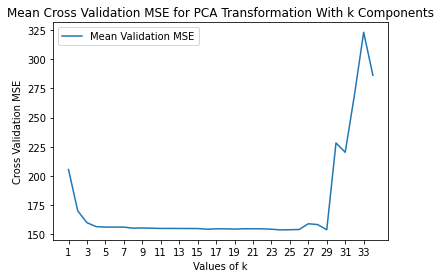

In [128]:
# Generate plot
plt.plot(k_list, cross_validation_error, label='Mean Validation MSE')
plt.xlabel('Values of k')
plt.xticks(np.arange(1,35,2))
plt.ylabel('Cross Validation MSE')
plt.title('Mean Cross Validation MSE for PCA Transformation With k Components')
plt.legend()
plt.show()

In [129]:
# Report best k
best_mse_idx = cross_validation_error.index(min(cross_validation_error))
best_k = k_list[best_mse_idx]
print(f"The best k based on the mean cross validation MSE is k={best_k}")

The best k based on the mean cross validation MSE is k=24


In [130]:
# your code here
# Fit PCA transformation with best_k
pca = PCA(n_components=best_k).fit(X_train_stand)
X_train_pca = pca.transform(X_train_stand)
X_test_pca = pca.transform(X_test_stand)

# Fit linear regression model to PCA-transformed components
linear = LinearRegression()
linear.fit(X_train_pca, y_train)
y_pred_test = linear.predict(X_test_pca)

# Calculate and report R^2
r2 = r2_score(y_test, y_pred_test)
print(f"The linear regression model fitted with PCA-transformed components has an R^2 score of {r2:.4f}")

The linear regression model fitted with PCA-transformed components has an R^2 score of 0.2746


In [137]:
# create/fit the 'full' pca transformation
pca = PCA().fit(encoded_df)

# apply the pca transformation to the full predictor set
pcaX = pca.transform(encoded_df)

# convert to a data frame
pcr_columns = []
for i in range(1,54):
  pcr_columns.append(f"PCA{i}")

pcaX_df = pd.DataFrame(pcaX, columns=pcr_columns)

# here are the weighting (eigen-vectors) of the variables (first 2 at least)
print("First PCA Component (w1):", pca.components_[0,:])
print("Second PCA Component (w2):", pca.components_[1,:])

display(pcaX_df)

First PCA Component (w1): [ 9.99762192e-01 -2.74944969e-03  1.02432865e-04 -2.28180207e-03
 -4.76662265e-05 -7.77928711e-07 -4.82416112e-06 -1.89496800e-08
  6.15565122e-08  6.90374327e-08  3.29487050e-06 -2.11729611e-04
  6.80317837e-05  5.04676678e-05  5.35235332e-04  1.15427186e-03
  3.17766591e-04 -2.94024677e-04 -2.15865116e-05  3.26503950e-05
 -8.72322762e-06 -1.78437364e-05  4.11768905e-03  1.31930403e-02
  2.33553420e-03 -5.58135099e-03  3.91164379e-03  1.08483602e-05
 -6.12001776e-03  2.08089700e-05 -1.06633442e-02 -6.65925894e-03
 -1.36963501e-03  4.51715214e-03 -1.41895925e-04  2.91042477e-04
 -2.96273041e-04  5.23056377e-06 -5.04502008e-06 -3.75629193e-06
  1.02088463e-04 -4.77893058e-06 -7.93921949e-07 -8.74853711e-06
 -3.30908427e-06  7.61983479e-05 -1.62972969e-05 -3.80250069e-06
 -1.08759831e-05  5.55319000e-05 -5.34646799e-07  7.60013401e-10
  6.24358847e-10]
Second PCA Component (w2): [ 4.81314086e-03 -5.46359414e-02  7.35503981e-04  9.90871282e-04
  2.88591639e-04  3

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24,PCA25,...,PCA29,PCA30,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50,PCA51,PCA52,PCA53
0,0.512,5.733,29.424,6.612,-28.165,32.647,-4.525,13.195,-5.738,-4.402,-15.362,-12.203,2.927,3.537,-2.284,1.211,1.030,-0.026,3.118,0.520,-0.021,-0.197,-0.537,0.639,-0.472,...,-0.128,-0.117,-0.560,5.815e-04,-0.098,0.041,0.030,-0.060,-0.008,1.435e-02,-1.258e-02,-1.603e-02,-0.040,0.011,0.010,-7.892e-04,-4.912e-03,0.002,-0.002,1.997e-03,6.569e-04,-7.051e-04,4.500e-05,3.856e-04,7.824e-17
1,0.153,5.746,31.300,0.602,-4.791,15.447,-18.489,-11.049,6.622,-2.906,1.777,-13.323,9.524,-3.933,3.648,-0.722,0.591,0.092,5.029,-3.564,0.759,-1.452,-0.895,0.349,-0.017,...,-0.061,-0.410,-0.304,-1.644e-01,0.862,0.089,0.027,0.127,0.400,5.805e-02,-3.763e-04,1.817e-02,-0.220,0.041,-0.091,-1.760e-02,7.653e-04,0.008,-0.005,-3.850e-05,1.132e-04,-3.279e-03,1.629e-04,6.048e-04,4.113e-16
2,0.258,-5.876,-52.460,8.157,-25.662,1.080,7.918,-8.673,4.054,3.966,2.406,10.653,1.056,-3.029,-0.088,1.441,-4.455,0.345,4.299,-0.156,-0.066,-0.287,-0.624,-0.364,-0.755,...,-0.116,-0.006,0.050,-2.000e-01,-0.104,-0.071,-0.005,-0.099,-0.181,1.185e+00,-2.031e-01,-1.053e-01,-0.119,-0.023,0.034,-2.854e-02,-7.829e-03,0.014,-0.008,1.539e-03,-4.496e-03,-4.137e-04,5.542e-04,1.003e-04,-1.484e-14
3,0.122,-1.630,-14.648,2.606,-9.088,8.319,-18.524,-14.081,-10.003,-0.922,1.114,2.161,3.878,-4.756,5.617,-0.873,-3.619,0.218,4.075,-3.434,1.728,-2.189,-1.167,0.161,-0.537,...,-0.073,0.228,-0.151,-1.223e-01,0.817,-0.036,0.025,0.119,0.237,-1.832e-02,-1.296e-03,2.587e-02,0.052,0.003,-0.105,-1.858e-02,-2.023e-03,0.004,-0.008,1.270e-03,-1.123e-04,-1.623e-03,6.790e-04,1.040e-03,-5.265e-15
4,0.514,-1.221,-27.276,11.357,-38.511,-24.424,5.123,-13.128,6.037,-0.539,-7.240,-5.499,-1.499,-1.001,-3.354,-3.184,4.506,-0.339,1.011,2.480,-0.876,0.420,-0.091,1.017,-0.819,...,-0.044,0.056,0.285,3.407e-02,-0.006,0.031,-0.057,0.182,0.255,-9.676e-03,-4.056e-03,8.617e-03,0.043,-0.015,0.020,-8.206e-03,-3.358e-03,0.002,-0.005,-5.138e-04,-4.602e-03,-1.200e-03,-1.063e-03,-6.620e-05,2.132e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14402,-0.215,6.803,51.520,-6.287,16.213,31.869,-13.743,-4.356,-7.422,2.062,11.688,-4.817,-8.392,-2.687,-1.282,0.659,-1.189,0.194,-1.074,2.462,0.138,-1.114,0.210,-1.468,-0.176,...,0.003,-0.314,-0.205,4.923e-01,-0.173,-0.049,0.017,-0.145,0.002,5.030e-02,-1.284e-03,2.541e-03,-0.075,0.007,0.030,-1.749e-02,7.796e-03,0.002,-0.007,1.168e-03,-4.597e-04,-2.328e-03,-3.683e-04,7.995e-05,-3.211e-15
14403,0.839,14.518,77.669,12.383,-54.432,0.835,16.578,12.722,-5.606,-2.578,-11.208,-7.100,-5.787,-2.501,1.349,-2.562,3.423,-0.233,0.462,0.871,-0.221,0.284,-0.460,0.495,0.648,...,-0.064,-0.020,-0.248,3.419e-01,-0.191,0.063,-0.046,-0.050,0.296,1.040e-02,1.465e-03,1.745e-02,-0.076,-0.002,0.026,4.764e-04,-2.510e-03,0.005,-0.002,3.530e-03,-3.147e-03,-2.529e-03,-9.590e-04,-2.757e-04,2.271e-15
14404,0.481,-1.095,-16.143,9.311,-33.209,-18.522,15.994,19.275,-2.752,0.526,-9.320,6.161,3.849,-6.926,-2.373,0.922,-0.031,0.450,-1.316,-1.086,-1.014,1.206,0.002,-0.169,-0.029,...,-0.082,0.112,-0.437,-2.356e-01,-0.090,0.046,-0.033,-0.375,0.373,7.945e-04,-1.698e-02,-2.484e-02,-0.066,-0.011,0.018,-5.026e-03,-4.501e-03,0.006,-0.003,2.091e-03,6.514e-04,-6.029e-04,2.614e-04,-1.221e-03,-5.026e-18
14405,-0.509,4.905,46.672,-11.451,37.701,8.954,3.820,10.365,7.488,-0.355,1.437,9.982,6.050,-0.238,-4.451,0.446,-0.070,-0.034,-1.931,-0.691,0.185,-0.947,0.406,-1.221,0.156,...,-0.067,0.027,0.043,7.807e-01,-0.095,-0.056,0.032,0.462,-0.745,-2.481e-02,-9.503e-04,1.730e-02,0.016,0.005,0.025,-4.127e-03,1.703e-02,-0.007,-0.018,-1.458e-03,6.429e-04,-2.892e-03,-1.656e-04,-2.747e-04,-2.975e-15


Variance explained by each component: [8.30349270e-01 5.41985645e-02 5.03755915e-02 2.19619134e-02
 1.75066690e-02 6.25157279e-03 5.72041148e-03 4.19516191e-03
 2.90948763e-03 1.87374263e-03 1.61787136e-03 1.20001037e-03
 1.03641550e-03 2.57907644e-04 1.17506587e-04 8.61919606e-05
 8.38266591e-05 7.69398583e-05 4.27145657e-05 4.02391719e-05
 2.14468660e-05 1.59191540e-05 1.24517587e-05 1.19229286e-05
 7.51040276e-06 5.15948056e-06 4.69135472e-06 3.72083389e-06
 2.62807457e-06 1.99929557e-06 1.98497778e-06 1.84192319e-06
 1.60891183e-06 9.44239289e-07 8.92289151e-07 5.24877002e-07
 4.86135026e-07 3.35809153e-07 3.25129640e-07 2.89895025e-07
 2.66288803e-07 2.48760295e-07 2.30538212e-07 1.85445699e-07
 1.12680929e-07 9.43551195e-08 9.31067872e-08 4.19577466e-08
 2.16310080e-08 9.35244382e-09 1.46269396e-09 1.41993649e-09
 8.28638053e-33]


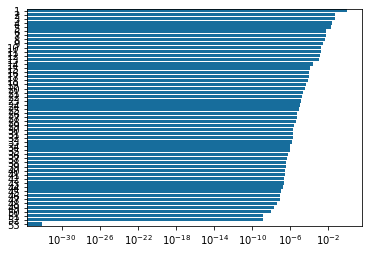

In [138]:
print("Variance explained by each component:", pca.explained_variance_ratio_)

blue = sns.color_palette("colorblind")[0]
sns.barplot(y=list(range(1,54)), x=pca.explained_variance_ratio_, orient="h", color=blue)
plt.xscale("log")

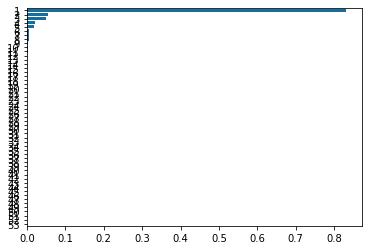

In [139]:
_ = sns.barplot(y=list(range(1,54)), x=pca.explained_variance_ratio_, orient="h", color=blue)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=24ab17b8-b2f8-4eb1-897f-b86e4cf16ad8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>